Import Necessary modules

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Summary Statistics & Missing-Value Report

In [22]:
df = pd.read_csv("../data/benin-malanville.csv")
print("Description of all numeric values : ")
df.describe()

Description of all numeric values : 


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [23]:
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [24]:
print("Check for missing values : ")
df.isna().sum()

Check for missing values : 


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [ ]:
print("List of columns with >5% nulls : ")
null_percent = df.isna().mean() * 100  #calculating null values percentage
null_percent[null_percent > 5]         #extracting those with percentages greater than 5

List of columns with >5% nulls : 


Comments    100.0
dtype: float64

Outlier Detection & Basic Cleaning

In [27]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# --- Calculate z-scores ---

for c in key_cols:

    df[c + '_z'] = stats.zscore(df[c], nan_policy='omit')

# --- Identify outlier rows ---

outliers = df[(df[[c + '_z' for c in key_cols]].abs() > 3).any(axis=1)]

# --- Replace outliers in the main df with median values ---

for col in key_cols:

    median_val = df[col].median()

    # Find rows (by index) where that column's z-score is > 3

    mask = df[col + '_z'].abs() > 3

    # Replace those outlier values with the column median

    df.loc[mask, col] = median_val

print("Outliers replaced per column:")

print((df[[c + '_z' for c in key_cols]].abs() > 3).sum())



Outliers replaced per column:
GHI_z          0
DNI_z          0
DHI_z       1030
ModA_z         0
ModB_z         0
WS_z         489
WSgust_z       0
dtype: int64


In [28]:
# There are no missing values on those key_cols
df[key_cols] = df[key_cols].apply(lambda x: x.fillna(x.median()))
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModA,TModB,Comments,GHI_z,DNI_z,DHI_z,ModA_z,ModB_z,WS_z,WSgust_z
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,26.3,26.2,NaN,-0.730027,-0.639591,-0.730700,-0.723726,-0.723035,-1.375662,-1.235481
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,26.3,26.2,NaN,-0.729724,-0.639591,-0.730700,-0.723726,-0.723035,-1.375662,-1.446199
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,26.4,26.2,NaN,-0.729724,-0.639591,-0.730700,-0.723726,-0.723035,-1.176473,-0.866724
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,26.4,26.3,NaN,-0.729724,-0.639209,-0.730035,-0.723726,-0.723035,-1.242869,-1.077442
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,26.4,26.3,NaN,-0.729422,-0.639209,-0.730035,-0.723726,-0.723035,-1.309266,-1.077442


In [29]:
df.to_csv('../data/benin_clean.csv', index=False)


Time Series Analysis

c:\Users\mihret.mekbebe\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


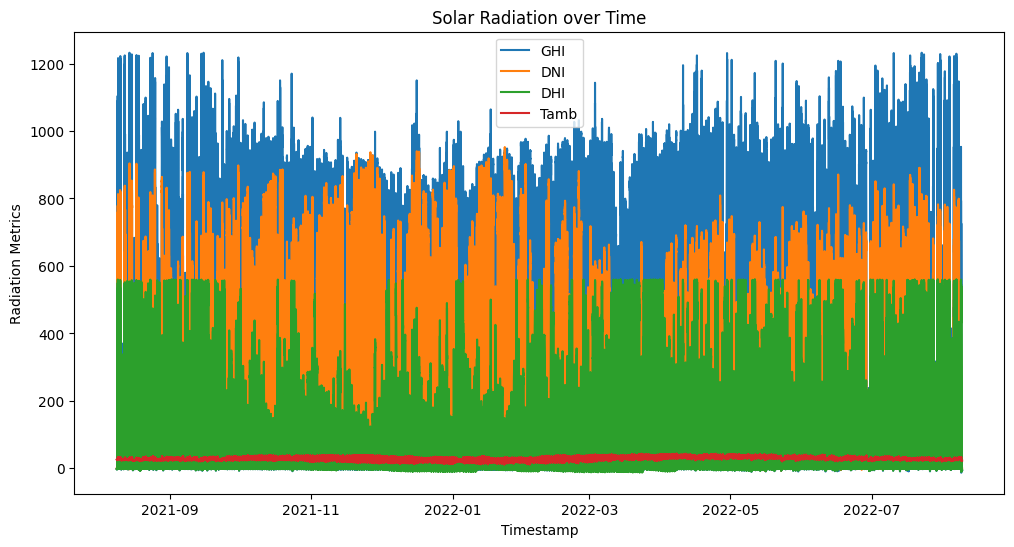

In [32]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')

# Line plots of key metrics
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.legend()
plt.title('Solar Radiation over Time')
plt.xlabel('Timestamp')
plt.ylabel('Radiation Metrics')
plt.show()


C:\Users\mihret.mekbebe\AppData\Local\Temp\ipykernel_33824\4108571805.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index('Timestamp').resample('M').mean()


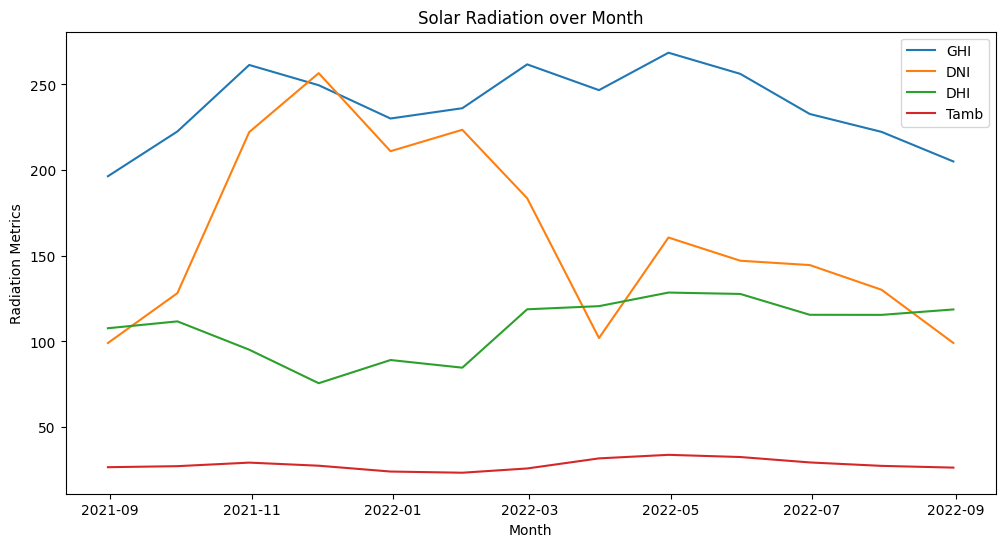

In [36]:
df_monthly = df.set_index('Timestamp').resample('M').mean()

df_monthly = df_monthly.reset_index()
# Line plots of key metrics
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['Timestamp'], df_monthly['GHI'], label='GHI')
plt.plot(df_monthly['Timestamp'], df_monthly['DNI'], label='DNI')
plt.plot(df_monthly['Timestamp'], df_monthly['DHI'], label='DHI')
plt.plot(df_monthly['Timestamp'], df_monthly['Tamb'], label='Tamb')
plt.legend()
plt.title('Solar Radiation over Month')
plt.xlabel('Month')
plt.ylabel('Radiation Metrics')
plt.show()


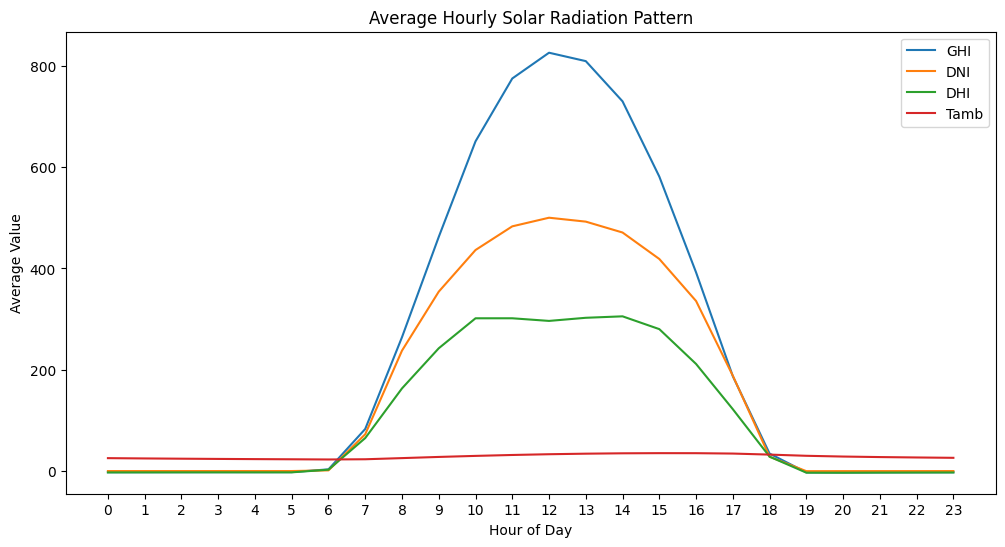

In [ ]:

# Extract the hour from each timestamp
df['hour'] = df['Timestamp'].dt.hour

# Average all measurements for each hour of the day
hourly_pattern = df.groupby('hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_pattern.index, hourly_pattern['GHI'], label='GHI')
plt.plot(hourly_pattern.index, hourly_pattern['DNI'], label='DNI')
plt.plot(hourly_pattern.index, hourly_pattern['DHI'], label='DHI')
plt.plot(hourly_pattern.index, hourly_pattern['Tamb'], label='Tamb')
plt.xticks(range(0, 24))
plt.xlabel('Hour')
plt.ylabel('Radiation Metrics Average Value')
plt.title('Solar Radiation throughout the Day')
plt.legend()
plt.show()
 

Cleaning Impact

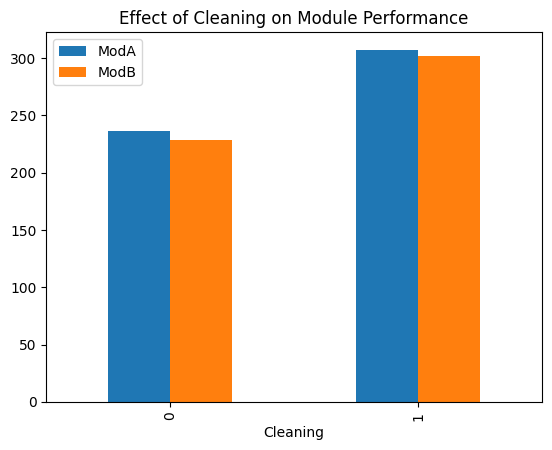

In [43]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Effect of Cleaning on Module Performance')
plt.show()


Correlation & Relationship Analysis

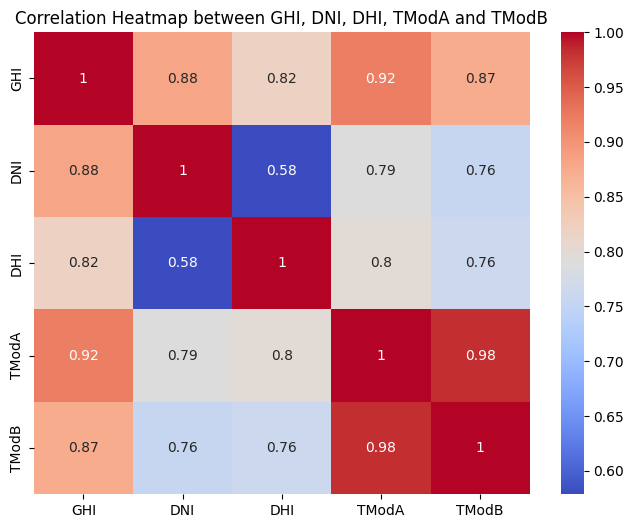

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between GHI, DNI, DHI, TModA and TModB')
plt.show()


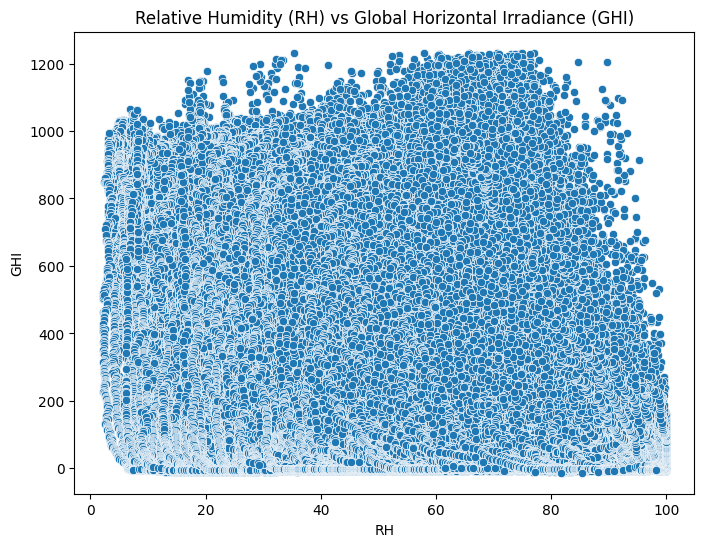

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('Relative Humidity (RH) vs Global Horizontal Irradiance (GHI)')
plt.show()


Wind & Distribution Analysis

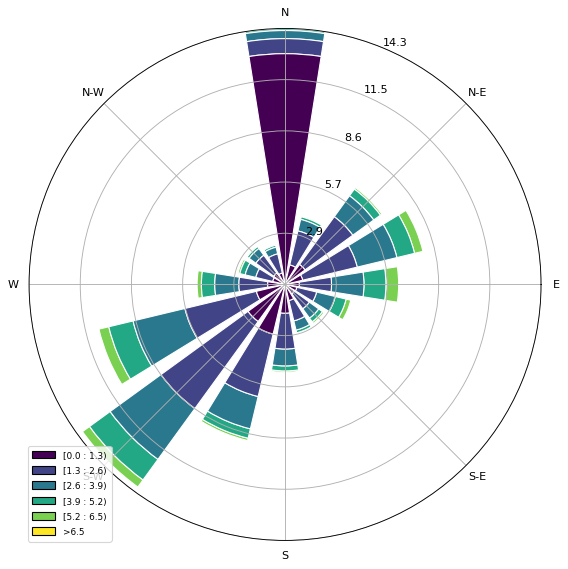

In [47]:
#!pip install windrose
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()


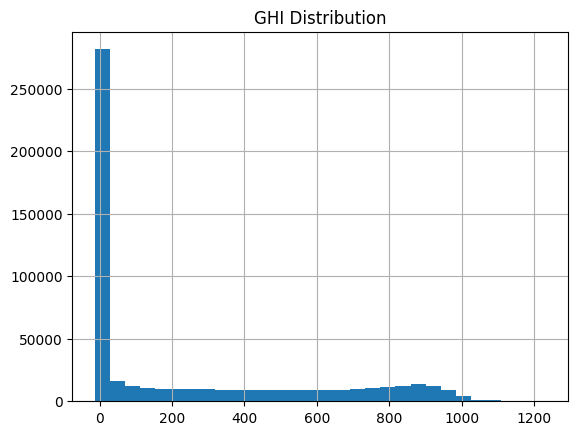

In [48]:
df['GHI'].hist(bins=30)
plt.title('GHI Distribution')
plt.show()


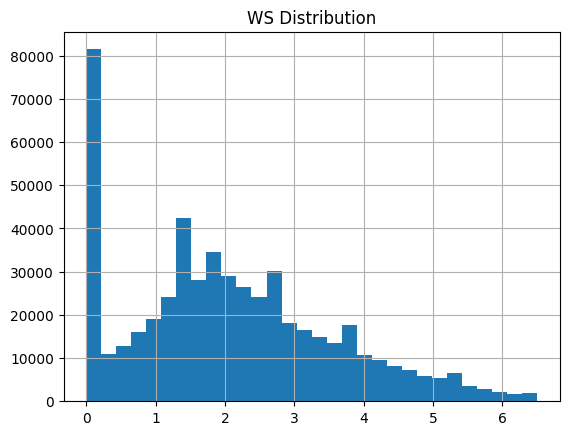

In [49]:
df['WS'].hist(bins=30)
plt.title('WS Distribution')
plt.show()


Temperature Analysis

c:\Users\mihret.mekbebe\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


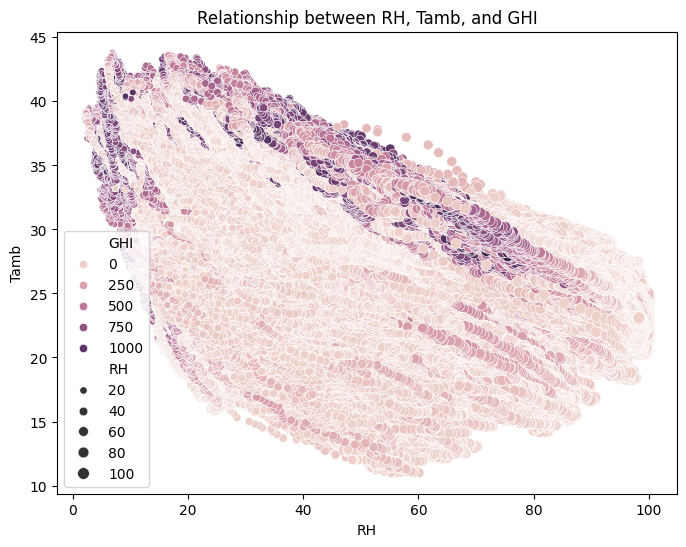

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RH', y='Tamb', hue='GHI', size='RH', data=df)
plt.title('Relationship between RH, Tamb, and GHI')
plt.show()


Bubble Chart

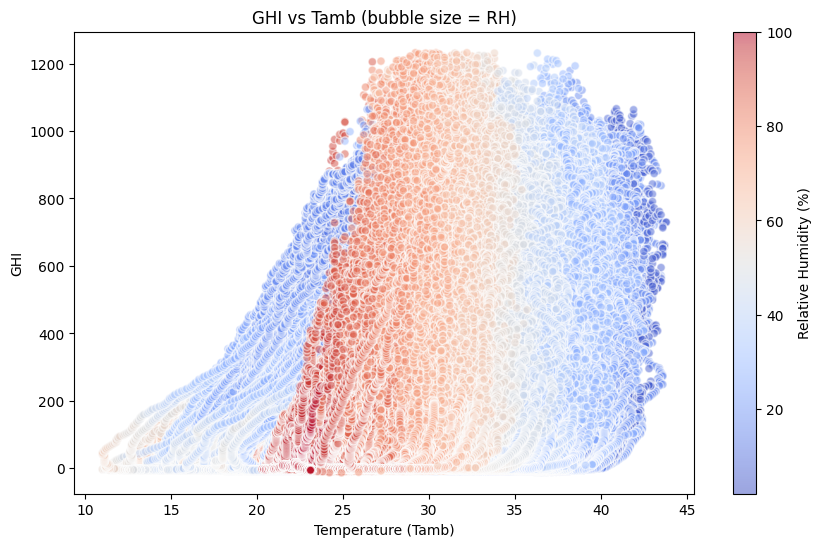

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(df['Tamb'], df['GHI'], c=df['RH'], alpha=0.5,  cmap='coolwarm', edgecolors='w')
plt.xlabel('Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('GHI vs Tamb (bubble size = RH)')
plt.colorbar(label='Relative Humidity (%)')
plt.show()
